In [1]:
import numpy as np
import matplotlib.pyplot as plt
from solve import solve_dual_entropic

Cost matrix


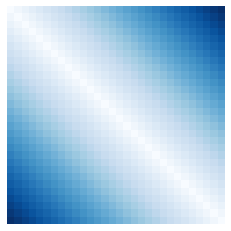

Target measure


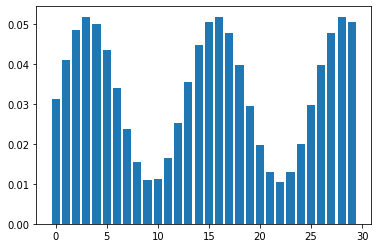

In [2]:
### INITIALIZE TEST

# set seed
np.random.seed(0)

# set dimension
n_source = 30
n_target = 30

# set target measure
#a = np.ones(n_source)
#a = a/a.sum()
a = 1.5 + np.sin([1*(k / n_source) * 15 for k in range(n_source)]) 
a = a / a.sum()

# set prior measure
b = np.ones(n_target)
b = b/b.sum()

# random distance matrix
# rng = np.random.RandomState(0)
# X_source = rng.randn(n_source, 2)
# Y_target = rng.randn(n_target, 2)
# M = ot.dist(X_source, Y_target)

# discrete distance
# M = (np.ones(n_source) - np.identity(n_source))

# distance on the line
X_source = np.array([k for k in range(n_source)])
Y_target = X_source
M = abs(X_source[:,None] - Y_target[None, :])

# normalize distance matrix (optional)
M = M / (M.max() - M.min())

# make distance matrix positive (mandatory!)
M = M - M.min()

# graph of matrix and target measure
fig, ax = plt.subplots()
print("Cost matrix")
ax.imshow(M, cmap=plt.cm.Blues)
plt.axis('off')
plt.show()
fig.savefig('tmp/cost_matrix.pdf', bbox_inches='tight')

print("Target measure")
plt.bar(range(n_source), a)
plt.show()

Nb iter:  1000000
Time:  26.3506757
Average iteration time:  2.63506757e-05
Transportation matrix


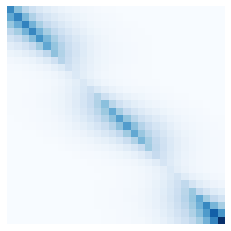

Target measure and estimate


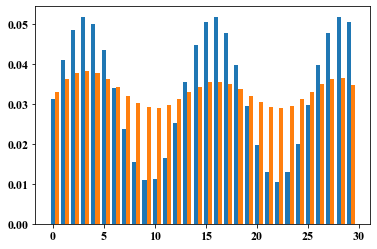

Final gradient norm: 0.002132267498304472
Convergence slope: -0.5359111143047688
Convergence rate of the gradient norm


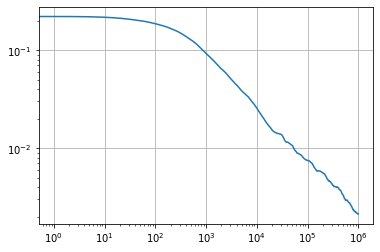

In [3]:
from graphs import performance_graphs

### PERFORMANCE TEST 1
# set seed
np.random.seed(1)
# set regularizer parameter
reg1 = 0.1
reg2 = 0.1
# set learning rate (reg1 is close to optimal, using a bigger one might make it diverge)
lr = reg1
# set batch size (0 means use of full gradient in beta, while stochastic in alpha)
batch_size = 1
# set algorithmic parameters (count between 10000 and 70000 iterations per seconds)
numItermax = 1000000
maxTime = 100

avg_alpha_list, avg_beta_list, time_list = solve_dual_entropic(a, b, M, reg1, reg2, numItermax, batch_size, lr, maxTime)
performance_graphs(a, b, M, reg1, reg2, avg_alpha_list, avg_beta_list, time_list)

Nb iter:  1000000
Time:  26.225920900000006
Average iteration time:  2.6225920900000005e-05
Transportation matrix


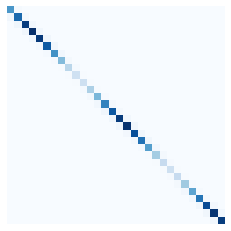

Target measure and estimate


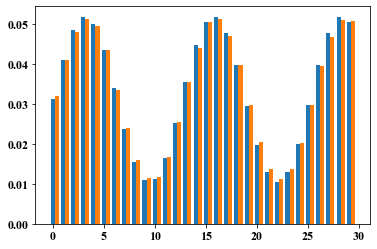

Final gradient norm: 0.010269847599719396
Convergence slope: -0.5351128378301692
Convergence rate of the gradient norm


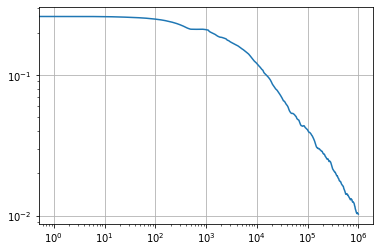

In [4]:
### PERFORMANCE TEST 2
# set seed
np.random.seed(1)
# set regularizer parameter
reg1 = 0.01
reg2 = 0.01
# set learning rate (reg1 is close to optimal, using a bigger one might make it diverge)
lr = reg1
# set batch size (0 means use of full gradient in beta, while stochastic in alpha)
batch_size = 1
# set algorithmic parameters (count between 10000 and 70000 iterations per seconds)
numItermax = 1000000
maxTime = 100

avg_alpha_list, avg_beta_list, time_list = solve_dual_entropic(a, b, M, reg1, reg2, numItermax, batch_size, lr, maxTime)
performance_graphs(a, b, M, reg1, reg2, avg_alpha_list, avg_beta_list, time_list)

Nb iter:  1000000
Time:  26.236947999999984
Average iteration time:  2.6236947999999984e-05
Nb iter:  1000000
Time:  24.212753299999974
Average iteration time:  2.4212753299999976e-05
Nb iter:  1000000
Time:  24.79928849999999
Average iteration time:  2.479928849999999e-05
Nb iter:  1000000
Time:  25.77947119999999
Average iteration time:  2.577947119999999e-05


C:\Users\Marin\Supports\Carrier\webpage\regularized-wasserstein-estimator\regularized-wasserstein-estimator\computations.py:35: RuntimeWarning: overflow encountered in exp
  cur_S += b * np.exp(- beta / reg2)
C:\Users\Marin\Supports\Carrier\webpage\regularized-wasserstein-estimator\regularized-wasserstein-estimator\computations.py:13: RuntimeWarning: overflow encountered in exp
  nu = b * np.exp(- beta / reg2) / S
C:\Users\Marin\Supports\Carrier\webpage\regularized-wasserstein-estimator\regularized-wasserstein-estimator\computations.py:13: RuntimeWarning: invalid value encountered in double_scalars
  nu = b * np.exp(- beta / reg2) / S
C:\Users\Marin\Supports\Carrier\webpage\regularized-wasserstein-estimator\regularized-wasserstein-estimator\computations.py:32: RuntimeWarning: overflow encountered in exp
  cur_S -= b * np.exp(- beta / reg2)
C:\Users\Marin\Supports\Carrier\webpage\regularized-wasserstein-estimator\regularized-wasserstein-estimator\computations.py:32: RuntimeWarning: inva

Nb iter:  1000000
Time:  30.97107649999998
Average iteration time:  3.097107649999998e-05


NameError: name 'b' is not defined

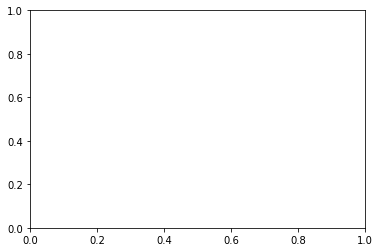

In [5]:
from graphs import compare_results

# PERFORMANCE: when regularization varies
numItermax = 1000000
np.random.seed(3)
reg1 = 0.01
reg2 = 0.01
lr = reg1
avg_alpha_list1, avg_beta_list1, time_list1 = solve_dual_entropic(a, b, M, reg1, reg2, numItermax, batch_size, lr/8, maxTime)
avg_alpha_list2, avg_beta_list2, time_list2 = solve_dual_entropic(a, b, M, reg1, reg2, numItermax, batch_size, lr/4, maxTime)
avg_alpha_list3, avg_beta_list3, time_list3 = solve_dual_entropic(a, b, M, reg1, reg2, numItermax, batch_size, lr/2, maxTime)
avg_alpha_list4, avg_beta_list4, time_list4 = solve_dual_entropic(a, b, M, reg1, reg2, numItermax, batch_size, lr, maxTime)
avg_alpha_list5, avg_beta_list5, time_list5 = solve_dual_entropic(a, b, M, reg1, reg2, numItermax, batch_size, 2 * lr, maxTime)
list_results_alpha = [avg_alpha_list1, avg_alpha_list2, avg_alpha_list3, avg_alpha_list4, avg_alpha_list5]
list_results_beta = [avg_beta_list1, avg_beta_list2, avg_beta_list3, avg_beta_list4, avg_beta_list5]
compare_results(list_results_alpha, list_results_beta)

In [ ]:
# PERFORMANCE: when dimension varies
# This initializes the variables with sample gaussians
def generate_var(n_source, n_target):
  X_source = rng.randn(n_source, 3)
  Y_target = rng.randn(n_target, 3)
  M = ot.dist(X_source, Y_target)
  M = M / (M.max() - M.min())
  M = M - M.min()
  a = np.ones(n_source)/n_source
  b = np.ones(n_target)/n_target
  return X_source, Y_target, M, a, b
batch_size = 1
np.random.seed(4)
reg1 = 0.01
reg2 = 0.01
lr = reg1
numItermax = 1000000
list_dimensions = [[30, 30], [100, 30], [30,100], [100, 100]]
list_results_alpha, list_results_beta = [], []
rng = np.random.RandomState(0)
fig, ax = plt.subplots()
SetPlotRC()
for D in list_dimensions:
  n_source = D[0]
  n_target = D[1]
  X_source, Y_target, M, a, b = generate_var(n_source, n_target)
  avg_alpha_list, avg_beta_list, time_list = solve_dual_entropic(a, b, M, reg1, reg2, numItermax, batch_size, lr, maxTime)
  target_list = [dual_to_target(b, reg2, beta) for beta in avg_beta_list]
  norm0 = norm_grad_dual(a, b, target_list[0], M, reg1, avg_alpha_list[0], avg_beta_list[0])
  grad_norm_list = [norm_grad_dual(a, b, target_list[i], M, reg1, avg_alpha_list[i], avg_beta_list[i])/norm0 for i in range(len(avg_alpha_list))]
  print("Final gradient norm:", grad_norm_list[-1])
  graph_loglog(grad_norm_list)
labels=['I = ' + str(D[0]) + ', J = ' + str(D[1]) for D in list_dimensions]
plt.grid()
plt.ylabel('Gradient norm', fontsize=12)
plt.xlabel('Number of iterations', fontsize=12)
plt.legend(labels)
ApplyFont(plt.gca())
fig.savefig('tmp/dimension_sens.pdf', bbox_inches='tight')
plt.show()

In [ ]:
## PREPARE FOR ANIMATION

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

target_list = [dual_to_target(b, reg2, beta) for beta in avg_beta_list[:50000]]

#def transport_map(alpha, beta, M, reg1, a, b):
#  G = np.exp((alpha[:, None] + beta[None, :] - M) / reg1) * a[:, None] * b[None, :]
#  return G / G.sum()

#transport_map_list = [transport_map(avg_alpha_list[i], avg_beta_list[i], M, reg1, a, b) for i in range(numItermax)]

In [ ]:
# ANIMATION OF THE TARGET MEASURE

fig=plt.figure()
# Number of frames (100 frames per second)
n = 1000

k = int(len(target_list)) // n
barWidth = 0.4

r1 = np.arange(n_source)
r2 = [x + barWidth for x in r1]
barcollection = plt.bar(r1, target_list[0], width=barWidth)
barcollection1 = plt.bar(r2, target_list[-1], width=barWidth)
plt.ylim(0, np.max(target_list[-1])*1.1)

def animate(t):
    y=target_list[t * k]
    for i, b in enumerate(barcollection):
        b.set_height(y[i])

anim=animation.FuncAnimation(fig, animate, repeat=False, blit=False, frames=n,
                             interval=10)

HTML(anim.to_html5_video())

In [ ]:
# ANIMATION OF THE TRANSPORT MAP
fig=plt.figure()
# Number of frames (100 frames per second)
n = 500

k = len(transport_map_list) // n
ims = []
for i in range(n):
    im = plt.imshow(transport_map_list[i*k], animated=True, cmap=plt.cm.Blues)
    ims.append([im])
anim2 = animation.ArtistAnimation(fig, ims, repeat=False, blit=False,
                             interval=10)

HTML(anim2.to_html5_video())